In [13]:
import pandas as pd
import numpy as np

In [2]:
#Lecture de la base des données
df = pd.read_csv("df_final_dubai.csv")

# STATISTIQUES DESCRIPTIVES

In [3]:
df.head()

,Date,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,TEMP_MOY,HUMIDITY_MAX_PERCENT,HUMIDITY_EST_AVG,WINDSPEED_MAX_KMH,WINDSPEED_AVG_KMH,PRECIP_TOTAL_DAY_MM,SUNHOUR,...,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,CO,NO2,SO2,O3,PM2.5,PM10,AQI,City
0,2024-01-01,25,23,23.75,71,53.25,19,11.4,0.0,10,...,1018,9.625,269.666667,16.775000,9.058333,83.083333,25.158333,68.591667,64.993683,Dubai
1,2024-01-02,24,22,23.25,67,50.25,28,16.8,0.0,10,...,1018,12.750,252.250000,14.841667,6.883333,87.250000,25.850000,64.383333,69.502499,Dubai
2,2024-01-03,24,21,22.25,63,47.25,21,12.6,0.0,9,...,1017,25.375,250.916667,17.187500,8.200000,80.541667,23.575000,64.666667,59.740902,Dubai
3,2024-01-04,24,22,23.25,67,50.25,37,22.2,0.0,10,...,1017,32.875,200.083333,9.270833,4.316667,86.916667,19.691667,46.479167,65.627639,Dubai
4,2024-01-05,23,21,21.75,60,45.00,18,10.8,0.0,10,...,1017,5.750,309.083333,25.420833,12.220833,77.916667,26.054167,51.237500,52.790759,Dubai


In [4]:
df.describe()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,TEMP_MOY,HUMIDITY_MAX_PERCENT,HUMIDITY_EST_AVG,WINDSPEED_MAX_KMH,WINDSPEED_AVG_KMH,PRECIP_TOTAL_DAY_MM,SUNHOUR,SR_EST_W_m2,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,CO,NO2,SO2,O3,PM2.5,PM10,AQI
count,366.000000,366.000000,366.000000,366.000000,366.00000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,30.956284,26.103825,28.172814,60.598361,45.44877,21.696721,13.018033,0.144536,11.879781,1781.967213,1009.718579,8.191257,440.464026,39.488297,20.308971,93.878415,41.574146,111.040619,85.113722
std,5.864521,4.864198,5.206393,9.944773,7.45858,5.795448,3.477269,1.602536,1.659106,248.865831,7.989379,12.765182,124.290300,16.864561,7.917554,36.922825,14.593006,65.267470,25.554694
min,20.000000,17.000000,18.750000,36.000000,27.00000,9.000000,5.400000,0.000000,2.000000,300.000000,993.000000,0.000000,200.083333,8.775000,4.316667,15.916667,12.087500,18.508333,40.561111
25%,25.000000,21.000000,23.000000,54.000000,40.50000,18.000000,10.800000,0.000000,11.000000,1650.000000,1003.000000,0.156250,346.354167,27.672917,15.086458,66.677083,30.313542,63.401042,67.222812
50%,31.000000,26.000000,28.625000,60.000000,45.00000,21.000000,12.600000,0.000000,12.000000,1800.000000,1011.000000,3.250000,434.416667,38.150000,20.333333,86.666667,40.427083,91.708333,78.422812
75%,36.000000,31.000000,33.250000,67.000000,50.25000,25.000000,15.000000,0.000000,13.000000,1950.000000,1016.750000,9.906250,519.927083,48.171875,25.414583,116.479167,51.193750,143.017708,98.414063
max,42.000000,34.000000,36.750000,92.000000,69.00000,41.000000,24.600000,29.500000,14.000000,2100.000000,1024.000000,92.375000,1012.750000,113.358333,53.775000,210.583333,98.437500,374.762500,191.291810


In [5]:
df.isnull().sum()


Date                      0
MAX_TEMPERATURE_C         0
MIN_TEMPERATURE_C         0
TEMP_MOY                  0
HUMIDITY_MAX_PERCENT      0
HUMIDITY_EST_AVG          0
WINDSPEED_MAX_KMH         0
WINDSPEED_AVG_KMH         0
PRECIP_TOTAL_DAY_MM       0
SUNHOUR                   0
SR_EST_W_m2               0
PRESSURE_MAX_MB           0
CLOUDCOVER_AVG_PERCENT    0
CO                        0
NO2                       0
SO2                       0
O3                        0
PM2.5                     0
PM10                      0
AQI                       0
City                      0
dtype: int64

## Outliers

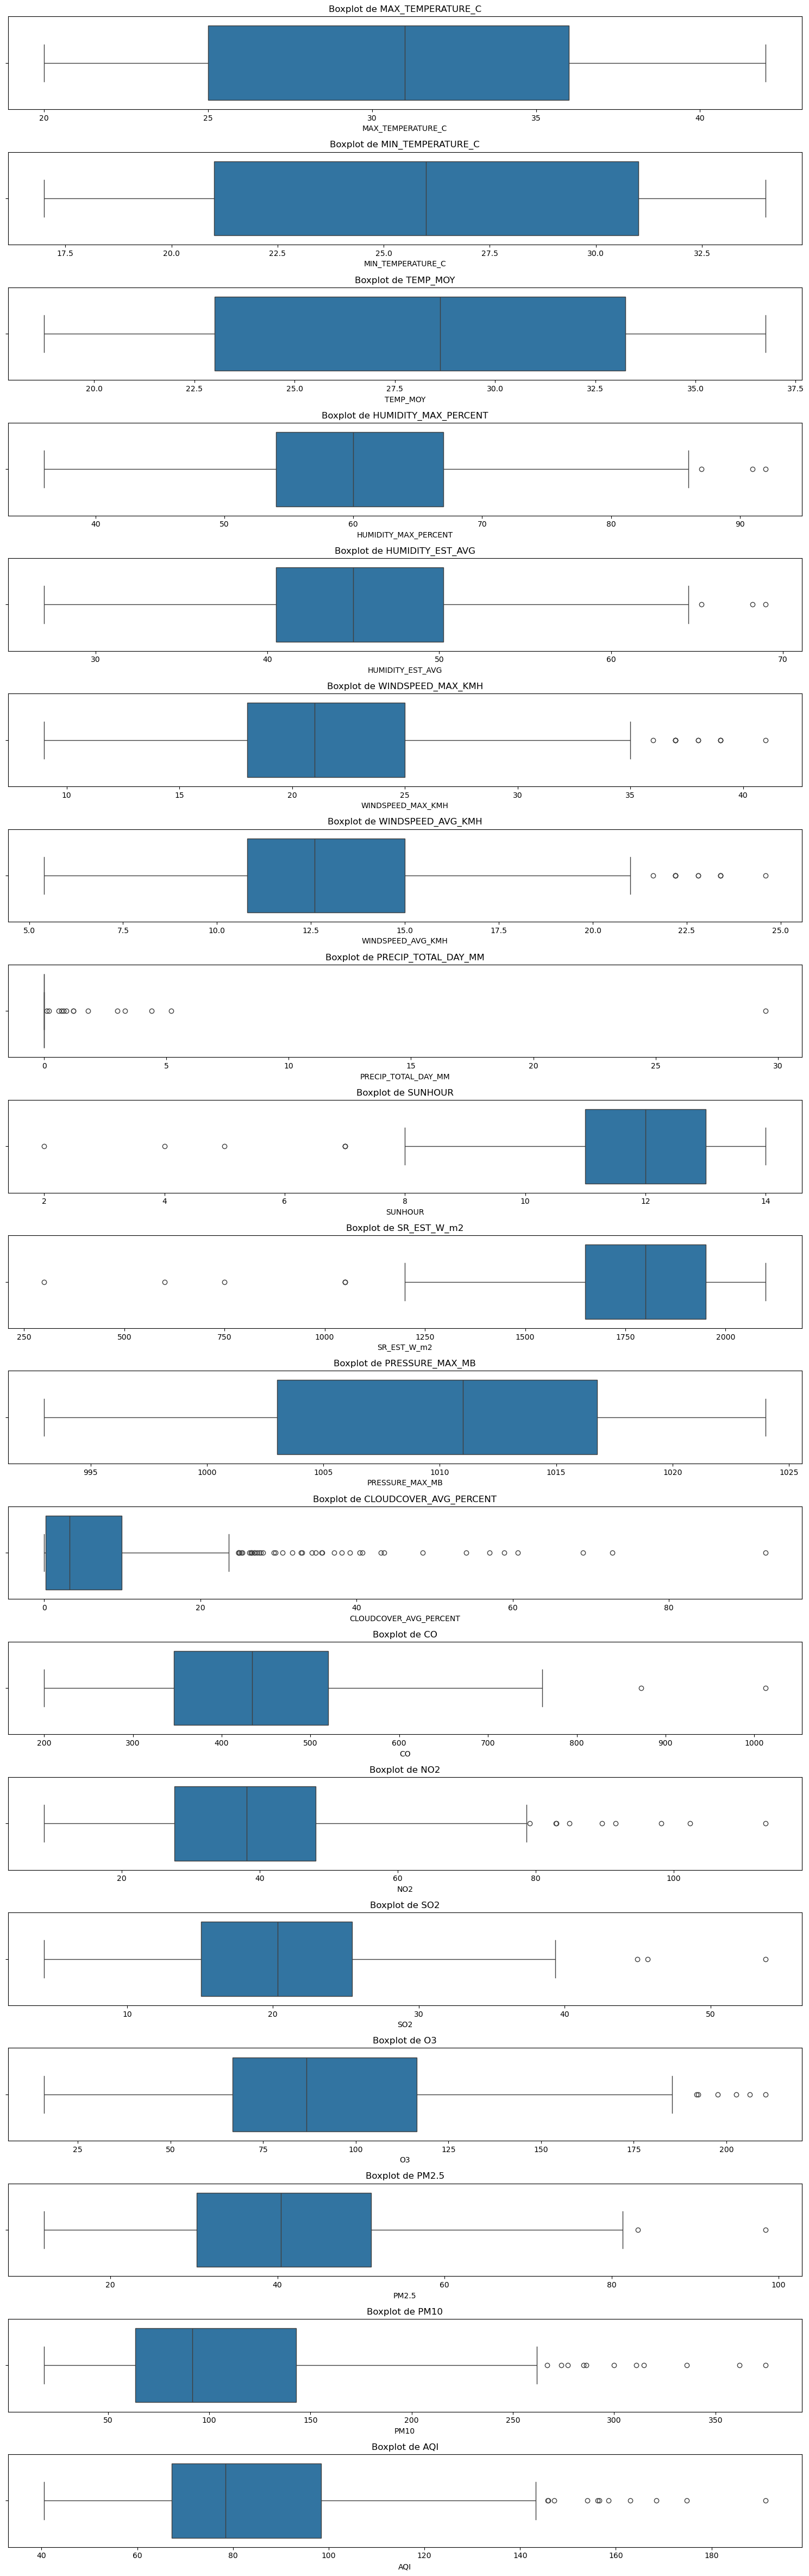

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes numériques
numeric_cols = df.select_dtypes(include=['number']).columns

# Définir la taille de la figure pour les boxplots
plt.figure(figsize=(15, len(numeric_cols) * 2.5))

# Générer les boxplots
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], orient='h')
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()

plt.show()

#### Traitement des valeurs extrêmes (outliers)
Dans cette étude, les valeurs extrêmes présentes dans les données n’ont pas été supprimées ni imputées. Cette décision repose sur le fait que, dans le contexte de la qualité de l’air, les outliers peuvent représenter des événements environnementaux réels et significatifs tels que des pics de pollution liés à des conditions météorologiques particulières, des épisodes de trafic intense ou d'autres incidents ponctuels. Les exclure reviendrait à ignorer des signaux critiques dans l’analyse. Afin de préserver l’intégrité des données et de refléter fidèlement leur variabilité naturelle, nous avons opté pour l’utilisation de modèles robustes (notamment la régression avec norme de Huber) qui permettent de limiter l’impact des valeurs extrêmes sans pour autant les écarter. Ce choix vise à assurer à la fois la validité scientifique de l’analyse et la pertinence opérationnelle des résultats, notamment pour la détection et l’interprétation des épisodes de pollution atypiques.


## Distribution des variables

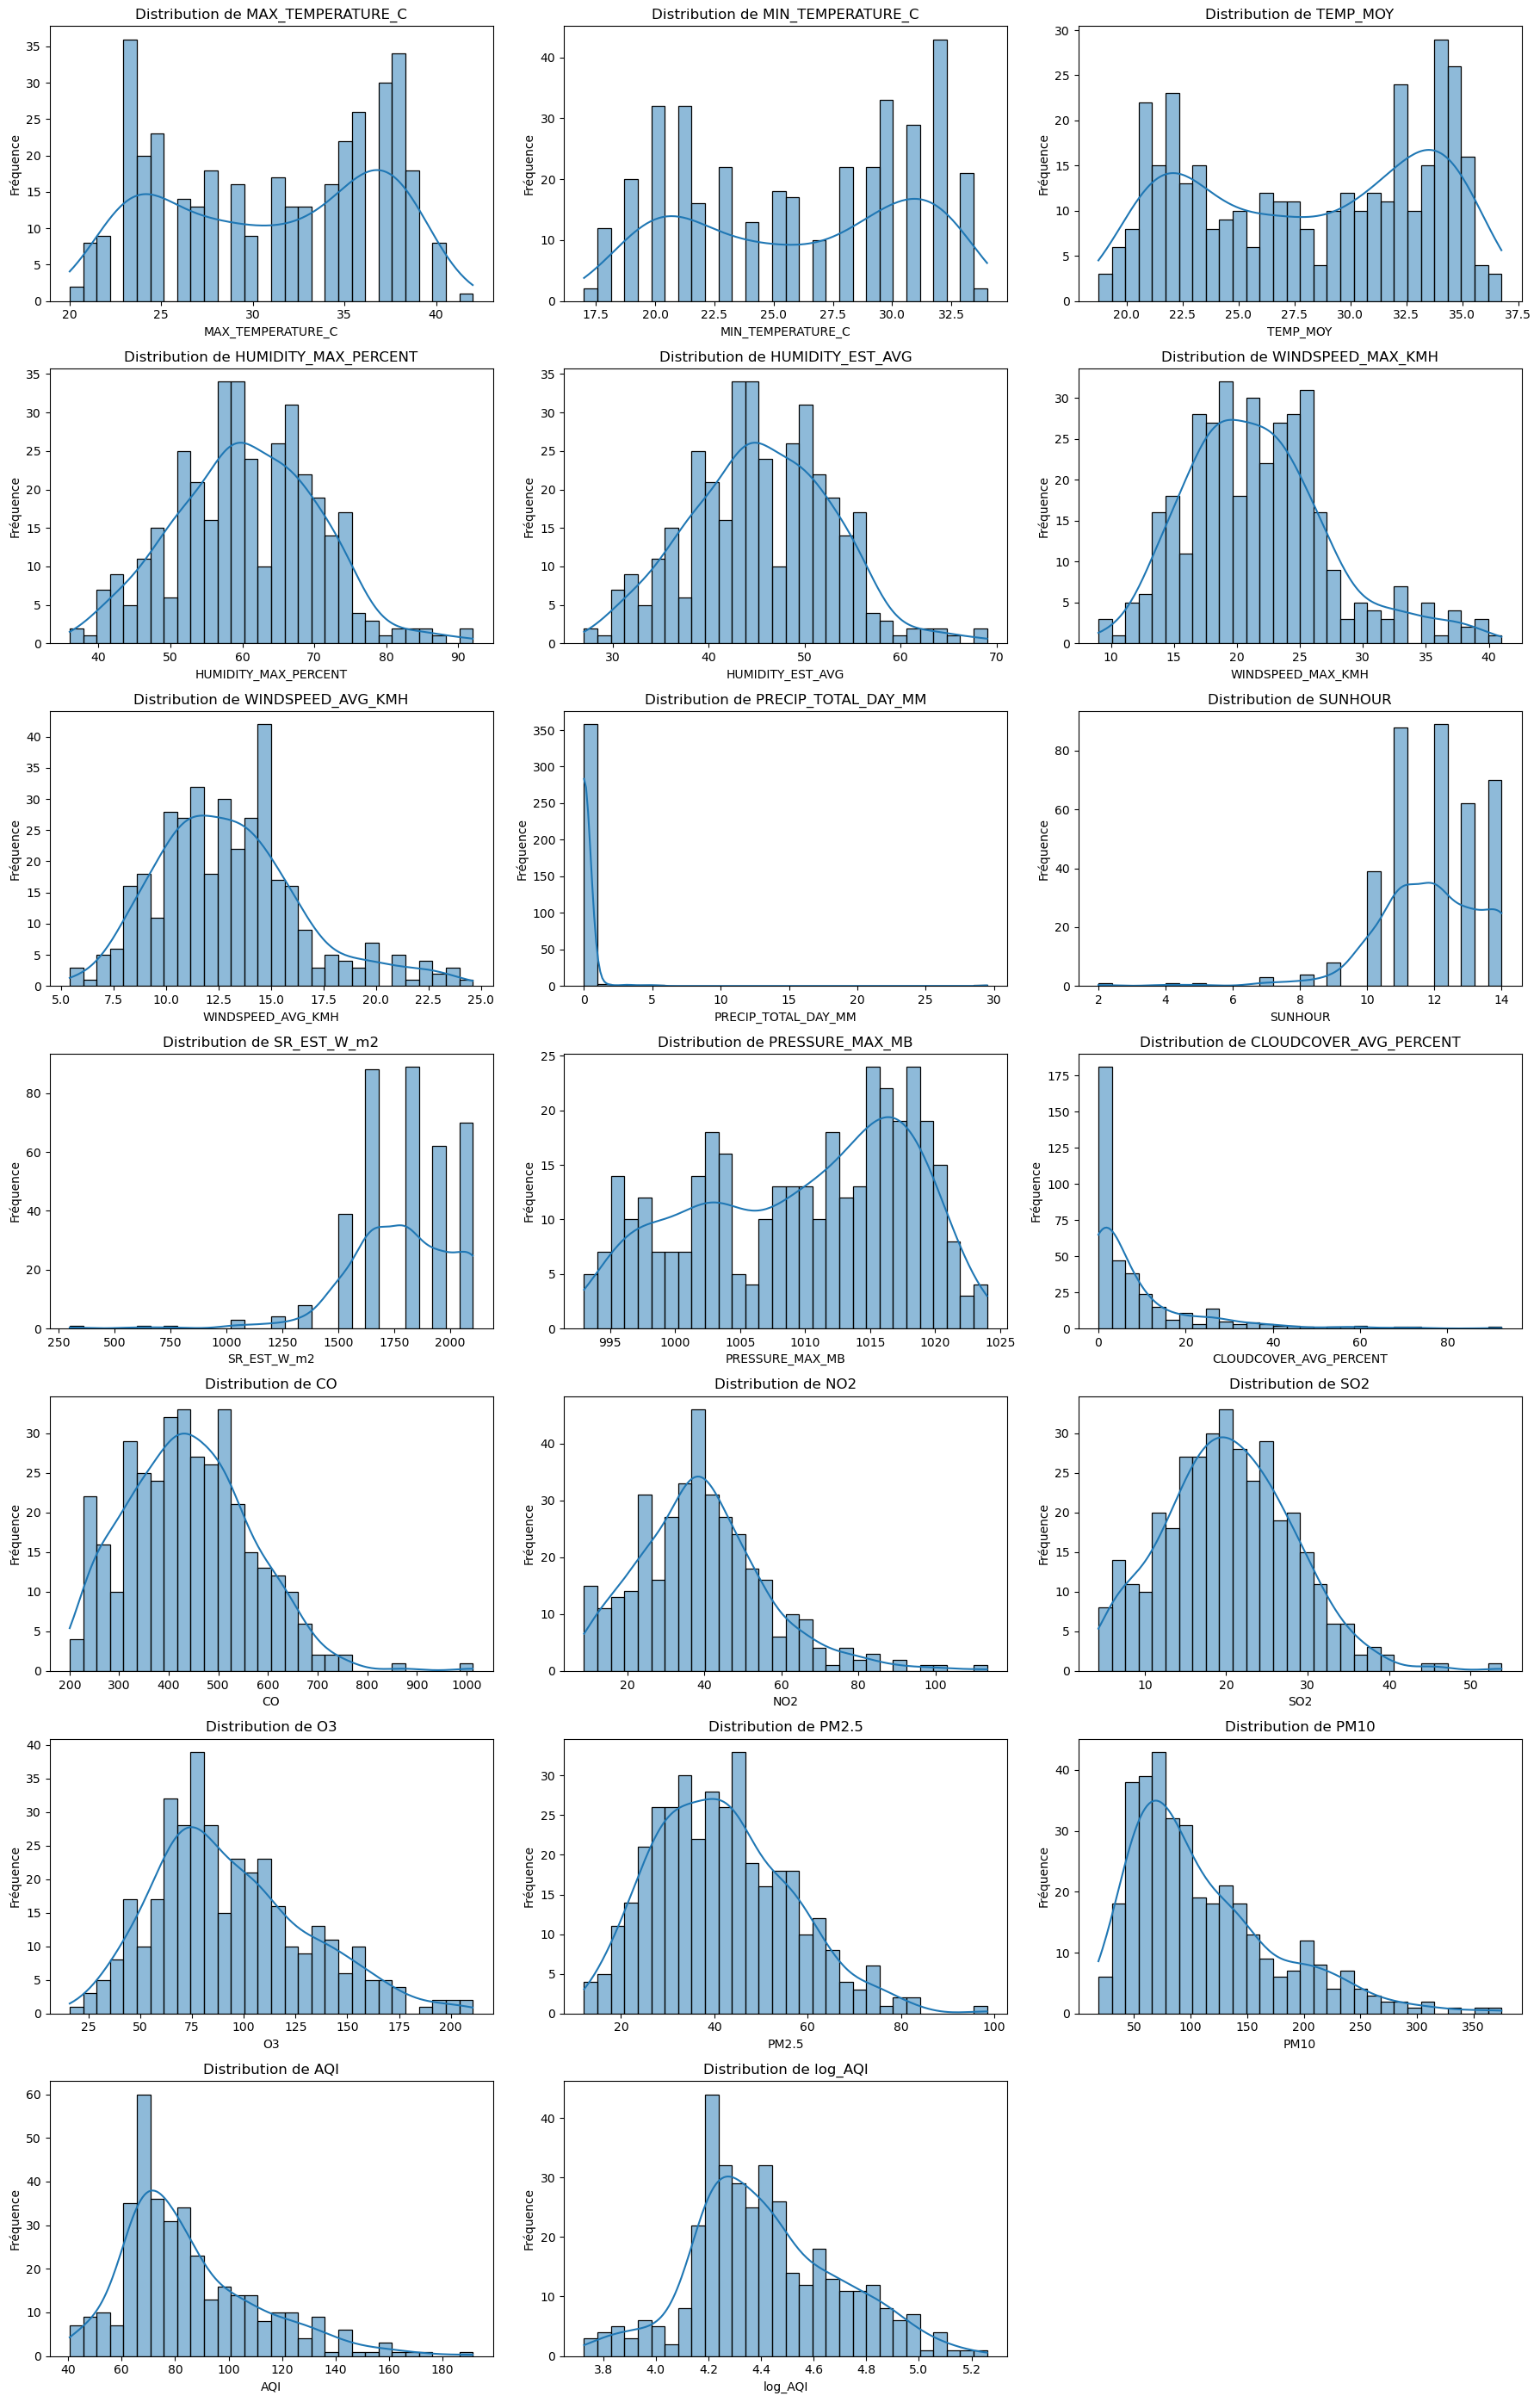

In [14]:
numeric_columns = df.select_dtypes(include=np.number).columns

# Définir la taille de la figure
n_cols = 3
n_rows = int(np.ceil(len(numeric_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Créer un histogramme avec courbe de densité pour chaque variable
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')

# Supprimer les axes vides si le nombre de variables < nombre de sous-graphiques
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Corrélation entre les variables

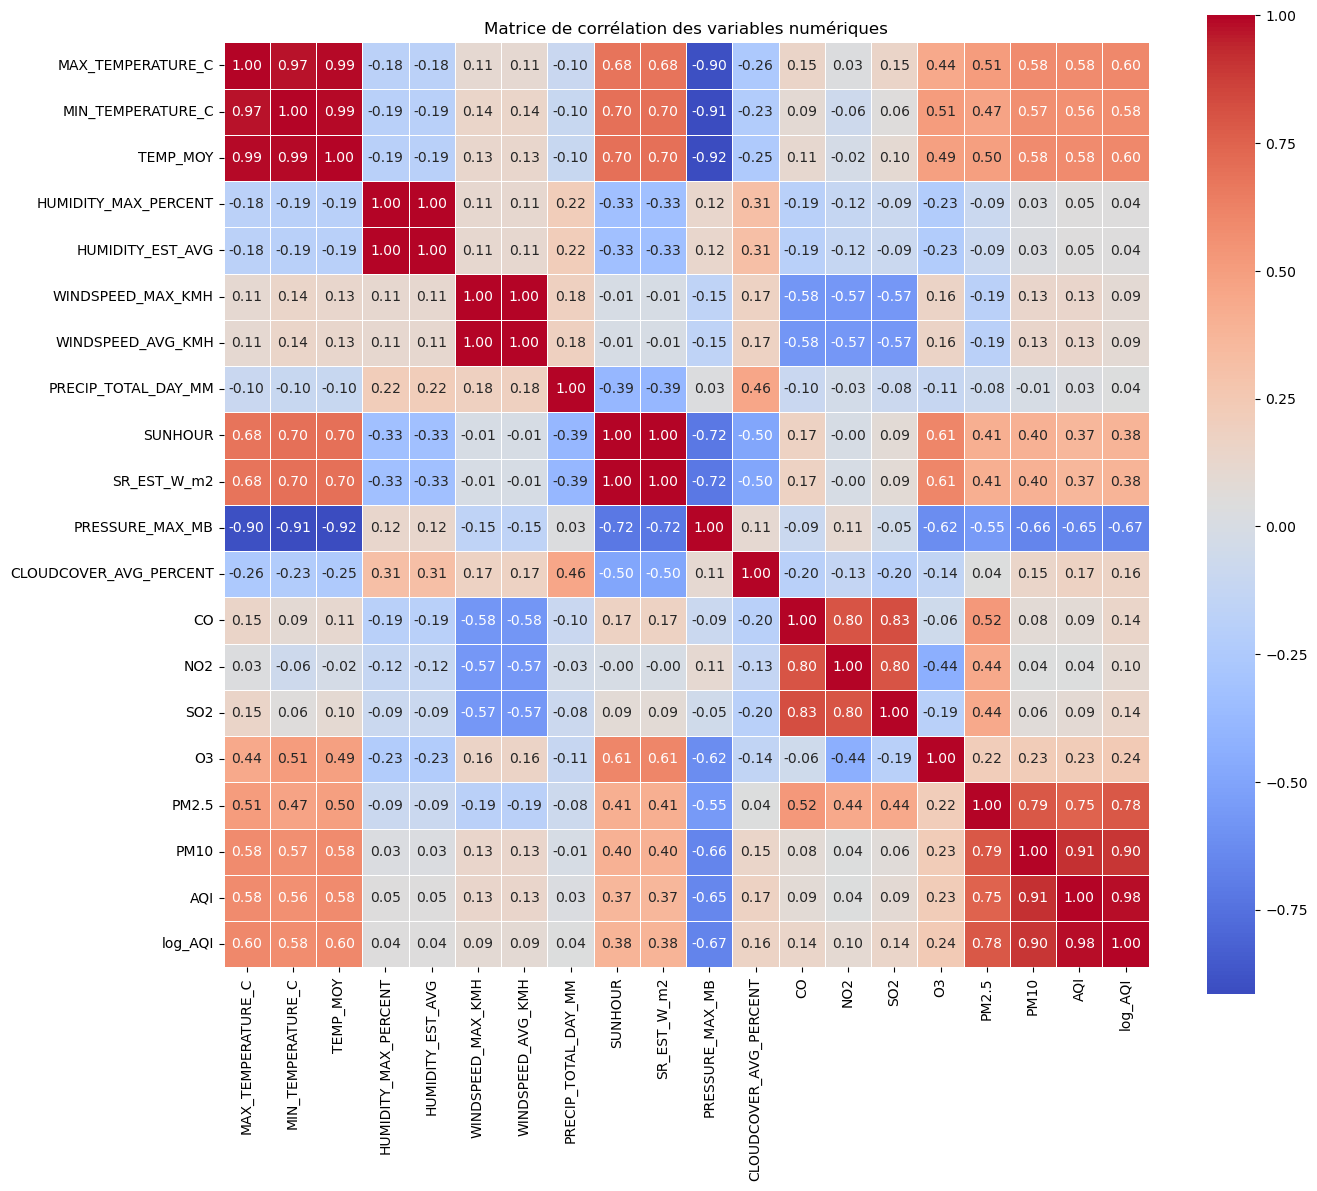

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)

# Définir la taille de la figure
plt.figure(figsize=(14, 12))

# Créer une heatmap avec annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Matrice de corrélation des variables numériques")
plt.tight_layout()
plt.show()


In [9]:
# Transformation de la variable cible (log AQI)
df['log_AQI'] = np.log(df['AQI'] + 1)


In [10]:
print(df.columns)

Index(['Date', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'TEMP_MOY',
       'HUMIDITY_MAX_PERCENT', 'HUMIDITY_EST_AVG', 'WINDSPEED_MAX_KMH',
       'WINDSPEED_AVG_KMH', 'PRECIP_TOTAL_DAY_MM', 'SUNHOUR', 'SR_EST_W_m2',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'CO', 'NO2', 'SO2', 'O3',
       'PM2.5', 'PM10', 'AQI', 'City', 'log_AQI'],
      dtype='object')


In [11]:
df['log_AQI'] = df['log_AQI'].astype(float)

## Corrélations entre AQI et les autres variables

In [16]:
# Corrélations avec AQI uniquement (triées)
corr_with_aqi = correlation_matrix[['log_AQI']].sort_values(by='log_AQI', ascending=False)

# Identification des couples de variables très fortement corrélées (> 0.8), en excluant la diagonale
high_corr_pairs = []
threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr_pairs.append((var1, var2, corr_value))

# Conversion en DataFrame pour affichage
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Corrélation'])

print("Corrélations avec log_AQI (triées) :")
print(corr_with_aqi)

print("\nPaires de variables très fortement corrélées (> 0.8) :")#ce sont des cas potentiels de multicolinéarité, à surveiller dans les modèles linéaires.
print(high_corr_df)

Corrélations avec log_AQI (triées) :
                         log_AQI
log_AQI                 1.000000
AQI                     0.982281
PM10                    0.895832
PM2.5                   0.783474
MAX_TEMPERATURE_C       0.601063
TEMP_MOY                0.599057
MIN_TEMPERATURE_C       0.579316
SUNHOUR                 0.384859
SR_EST_W_m2             0.384859
O3                      0.237639
CLOUDCOVER_AVG_PERCENT  0.164628
CO                      0.141650
SO2                     0.140435
NO2                     0.097733
WINDSPEED_AVG_KMH       0.087750
WINDSPEED_MAX_KMH       0.087750
HUMIDITY_EST_AVG        0.043023
HUMIDITY_MAX_PERCENT    0.043023
PRECIP_TOTAL_DAY_MM     0.036293
PRESSURE_MAX_MB        -0.666732

Paires de variables très fortement corrélées (> 0.8) :
              Variable 1         Variable 2  Corrélation
0      MAX_TEMPERATURE_C  MIN_TEMPERATURE_C     0.970381
1      MAX_TEMPERATURE_C           TEMP_MOY     0.990464
2      MAX_TEMPERATURE_C    PRESSURE_MAX_MB

In [18]:
# Conversion de la date au bon format
df['Date'] = pd.to_datetime(df['Date'])
# Création des variables temporelles
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday
df['week'] = df['Date'].dt.isocalendar().week
df['year'] = df['Date'].dt.year
df['TimeIndex'] = np.arange(len(df))

# Optionnel : ajouter une variable "saison"
def get_season_dubai(month):
    if month in [12, 1, 2, 3]:
        return 'hiver'
    elif month in [5, 6, 7, 8, 9]:
        return 'été'
    else:  # avril, octobre, novembre
        return 'transition'

df['saison'] = df['month'].apply(get_season_dubai)
df = pd.get_dummies(df, columns=['saison'], drop_first=True)

In [19]:
df.head()

,Date,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,TEMP_MOY,HUMIDITY_MAX_PERCENT,HUMIDITY_EST_AVG,WINDSPEED_MAX_KMH,WINDSPEED_AVG_KMH,PRECIP_TOTAL_DAY_MM,SUNHOUR,...,City,log_AQI,day,month,weekday,week,year,TimeIndex,saison_transition,saison_été
0,2024-01-01,25,23,23.75,71,53.25,19,11.4,0.0,10,...,Dubai,4.189559,1,1,0,1,2024,0,False,False
1,2024-01-02,24,22,23.25,67,50.25,28,16.8,0.0,10,...,Dubai,4.255648,2,1,1,1,2024,1,False,False
2,2024-01-03,24,21,22.25,63,47.25,21,12.6,0.0,9,...,Dubai,4.106617,3,1,2,1,2024,2,False,False
3,2024-01-04,24,22,23.25,67,50.25,37,22.2,0.0,10,...,Dubai,4.199119,4,1,3,1,2024,3,False,False
4,2024-01-05,23,21,21.75,60,45.00,18,10.8,0.0,10,...,Dubai,3.985102,5,1,4,1,2024,4,False,False


# ECONOMETRIE

In [20]:
# 📦 Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.robust.robust_linear_model import RLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad

In [26]:
import statsmodels.api as sm
from statsmodels.robust.norms import HuberT
# Sélection des variables explicatives
# ✅ Variables explicatives sélectionnées selon la littérature et la corrélation avec log_AQI
features = [
    'PM2.5',                    # Particules fines – très fortement liées à AQI
    'CO',                       # Monoxyde de carbone
    #'NO2',                      # Dioxyde d’azote
    'SO2',                      # Dioxyde de soufre
    #'Benzène',                  # Composé organique volatil (COV cancérogène)– modérément corrélé
    'O3',                       # Ozone – relation complexe mais important pour la chimie atmosphérique
    #'Toluène',                  # COV souvent utilisé en interaction

    # Variables météorologiques de contrôle
    'TEMP_MOY',                 # Température moyenne
    'WINDSPEED_AVG_KMH',         # Vitesse moyenne du vent
    'PRECIP_TOTAL_DAY_MM',     # Précipitations
    'CLOUDCOVER_AVG_PERCENT',   # Couverture nuageuse
    'month', 
    'weekday', 
    #'TimeIndex'
]
X = df[features]
X = X.loc[:, ~X.columns.duplicated()]  # Supprimer les colonnes dupliquées
X = sm.add_constant(X)
y = df['log_AQI']

# Modèle OLS classique avec toutes les variables
model_ols = sm.OLS(y, X).fit()

# Afficher les résultats
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                log_AQI   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     122.5
Date:                Sat, 12 Jul 2025   Prob (F-statistic):          1.33e-108
Time:                        16:50:14   Log-Likelihood:                 220.52
No. Observations:                 366   AIC:                            -419.0
Df Residuals:                     355   BIC:                            -376.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3


✅ RÉSUMÉ DU MODÈLE
                            OLS Regression Results                            
Dep. Variable:                log_AQI   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     122.5
Date:                Sat, 12 Jul 2025   Prob (F-statistic):          1.33e-108
Time:                        16:50:17   Log-Likelihood:                 220.52
No. Observations:                 366   AIC:                            -419.0
Df Residuals:                     355   BIC:                            -376.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

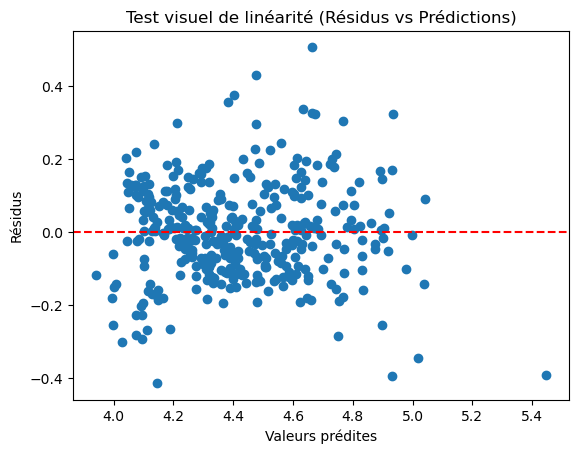


📊 Homoscédasticité - Test de Breusch-Pagan
LM statistic : 20.409, p-value : 0.0256

📊 Normalité des résidus
Shapiro-Wilk p-value : 0.0073
Jarque-Bera p-value : 0.0005

📊 Indépendance des erreurs - Durbin-Watson
Durbin-Watson statistic : 1.311 (idéal proche de 2)

📊 VIF - Facteurs d'inflation de la variance
                  Variable        VIF
0                    const  92.851693
1                    PM2.5   2.277162
2                       CO   4.442861
3                      SO2   4.802352
4                       O3   1.500061
5                 TEMP_MOY   2.239586
6        WINDSPEED_AVG_KMH   1.746261
7      PRECIP_TOTAL_DAY_MM   1.337931
8   CLOUDCOVER_AVG_PERCENT   1.636035
9                    month   1.637105
10                 weekday   1.016229


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from statsmodels.api import OLS, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from scipy.stats import shapiro

def verifier_hypotheses_gauss_markov(X, y):
    # Ajout de constante
    X_const = add_constant(X)
    model = OLS(y, X_const).fit()
    
    print("\n✅ RÉSUMÉ DU MODÈLE")
    print(model.summary())
    
    # 1. Linéarité (Graphique résidus vs valeurs prédites)
    plt.figure()
    plt.scatter(model.fittedvalues, model.resid)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Résidus")
    plt.title("Test visuel de linéarité (Résidus vs Prédictions)")
    plt.show()

    # 2. Homoscédasticité - Test de Breusch-Pagan
    print("\n📊 Homoscédasticité - Test de Breusch-Pagan")
    bp_test = het_breuschpagan(model.resid, model.model.exog)
    print(f"LM statistic : {bp_test[0]:.3f}, p-value : {bp_test[1]:.4f}")

    # 3. Normalité des résidus
    print("\n📊 Normalité des résidus")
    shapiro_test = shapiro(model.resid)
    jb_test = jarque_bera(model.resid)
    print(f"Shapiro-Wilk p-value : {shapiro_test.pvalue:.4f}")
    print(f"Jarque-Bera p-value : {jb_test[1]:.4f}")

    # 4. Indépendance des erreurs - Durbin-Watson
    print("\n📊 Indépendance des erreurs - Durbin-Watson")
    dw = durbin_watson(model.resid)
    print(f"Durbin-Watson statistic : {dw:.3f} (idéal proche de 2)")

    # 5. Multicolinéarité - VIF
    print("\n📊 VIF - Facteurs d'inflation de la variance")
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
    print(vif_data)

    return model

verifier_hypotheses_gauss_markov(X, y)

Voici un **commentaire interprétatif détaillé** de vos résultats statistiques :

---

### **Homoscédasticité - Test de Breusch-Pagan**
* Le test de Breusch-Pagan teste l'hypothèse nulle d'**homoscédasticité** (variance constante des résidus).
* Ici, la **p-value est très faible (< 0.05)** → on **rejette l’hypothèse nulle**.
* 👉 Il y a donc **hétéroscédasticité** : les résidus n’ont **pas une variance constante**, ce qui viole l'une des hypothèses de Gauss-Markov.
  ➡️ Cela peut affecter la validité des tests statistiques (comme les p-values des coefficients).
---
### **Normalité des résidus**

* **Shapiro-Wilk p-value : 0.0000**
* **Jarque-Bera p-value : 0.0000**
* Les deux tests rejettent l'hypothèse de **normalité des résidus** (p < 0.05).
* 👉 Cela indique que la distribution des résidus est **anormale**, ce qui pose problème pour la validité des intervalles de confiance et tests t classiques.
* ➕ Cela peut aussi indiquer la présence de **valeurs aberrantes** ou une **spécification incorrecte** du modèle.

### **Indépendance des erreurs - Durbin-Watson**

* **Statistique DW = 1.688** (idéal = 2
* Une valeur proche de 2 indique une indépendance des erreurs.
* Ici, **1.688** est légèrement inférieur, ce qui pourrait indiquer **une légère autocorrélation positive**.
* Ce n’est **pas catastrophique**, mais à surveiller, surtout si les données sont temporelles.

---
### **Multicolinéarité - VIF (Variance Inflation Factor)**
* Un VIF > 5 (voire > 10 selon certains auteurs) suggère une **multicolinéarité modérée à forte**.
* Cela signifie que certaines variables explicatives sont **fortement corrélées entre elles**, ce qui peut :

  * gonfler les erreurs standards,
  * rendre les coefficients instables,
  * et compliquer l’interprétation individuelle des variables.

* Les autres variables (Toluène, TEMP\_MOY, etc.) ont des VIF < 3 → pas de problème.
---

### ✅ **Conclusion globale :**

* Le modèle viole **plusieurs hypothèses de Gauss-Markov** :

  * **Hétéroscédasticité**
  * **Non-normalité des résidus**
  * **Multicolinéarité pour certaines variables**
* 👉 Il est conseillé de :

  * **Tester des transformations** (logarithmes, interactions),
  * **Utiliser un modèle robuste** (comme `RLM()` de `statsmodels` avec norme de Huber),
  * **Réduire la multicolinéarité** (ex : supprimer ou combiner des variables fortement corrélées comme `CO` et `SO2`),
  * **Vérifier les outliers** et **diagnostiquer les résidus** plus finement (qq-plots, boxplots, etc.).



In [28]:
import statsmodels.api as sm
from statsmodels.robust.norms import HuberT

# Modèle robuste avec la norme de Huber
model_rlm = sm.RLM(y, X, M=HuberT()).fit()

# Afficher les résultats
print(model_rlm.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                log_AQI   No. Observations:                  366
Model:                            RLM   Df Residuals:                      355
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 12 Jul 2025                                         
Time:                        16:52:27                                         
No. Iterations:                    22                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3


✅ RÉSUMÉ DU MODÈLE ROBUSTE (RLM - Huber)
                    Robust linear Model Regression Results                    
Dep. Variable:                log_AQI   No. Observations:                  366
Model:                            RLM   Df Residuals:                      355
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 12 Jul 2025                                         
Time:                        16:52:33                                         
No. Iterations:                    22                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

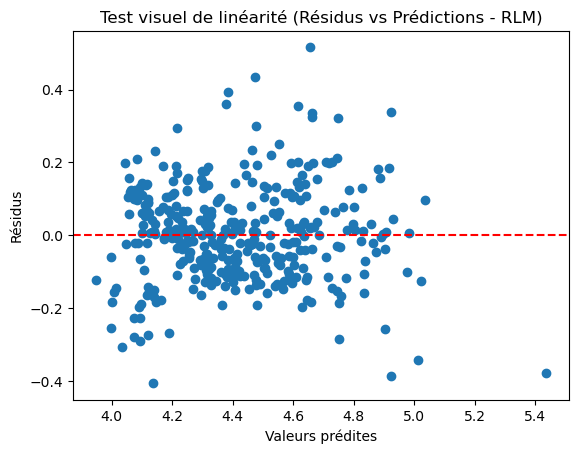


📊 VIF - Facteurs d'inflation de la variance
                  Variable        VIF
0                    const  92.851693
1                    PM2.5   2.277162
2                       CO   4.442861
3                      SO2   4.802352
4                       O3   1.500061
5                 TEMP_MOY   2.239586
6        WINDSPEED_AVG_KMH   1.746261
7      PRECIP_TOTAL_DAY_MM   1.337931
8   CLOUDCOVER_AVG_PERCENT   1.636035
9                    month   1.637105
10                 weekday   1.016229

📊 Indépendance des erreurs - Durbin-Watson
Durbin-Watson statistic : 1.293 (idéal proche de 2)


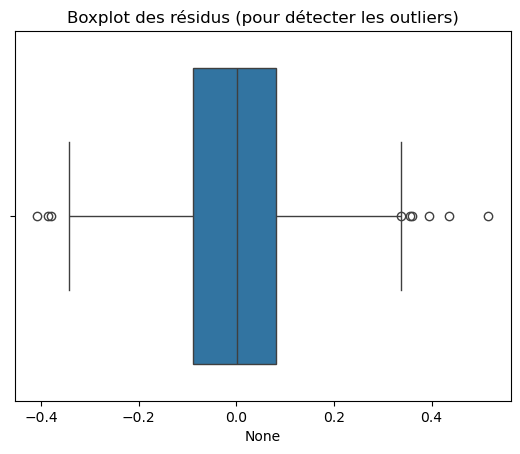

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

def verifier_rlm_robuste(X, y):
    # Ajout de la constante
    X_const = sm.add_constant(X)
    
    # Estimation du modèle RLM avec norme de Huber
    model_rlm = sm.RLM(y, X_const, M=sm.robust.norms.HuberT())
    results_rlm = model_rlm.fit()

    # Résumé
    print("\n✅ RÉSUMÉ DU MODÈLE ROBUSTE (RLM - Huber)")
    print(results_rlm.summary())
    
    # 1. Graphique Résidus vs Prédictions (linéarité)
    plt.figure()
    plt.scatter(results_rlm.fittedvalues, results_rlm.resid)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Résidus")
    plt.title("Test visuel de linéarité (Résidus vs Prédictions - RLM)")
    plt.show()

    # 2. VIF - Multicolinéarité
    print("\n📊 VIF - Facteurs d'inflation de la variance")
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
    print(vif_data)

    # 3. Durbin-Watson (Indépendance des erreurs)
    print("\n📊 Indépendance des erreurs - Durbin-Watson")
    dw_stat = durbin_watson(results_rlm.resid)
    print(f"Durbin-Watson statistic : {dw_stat:.3f} (idéal proche de 2)")

    # 4. Boxplot des résidus (détection d’outliers)
    plt.figure()
    sns.boxplot(x=results_rlm.resid)
    plt.title("Boxplot des résidus (pour détecter les outliers)")
    plt.show()

    return results_rlm
verifier_rlm_robuste(X, y)

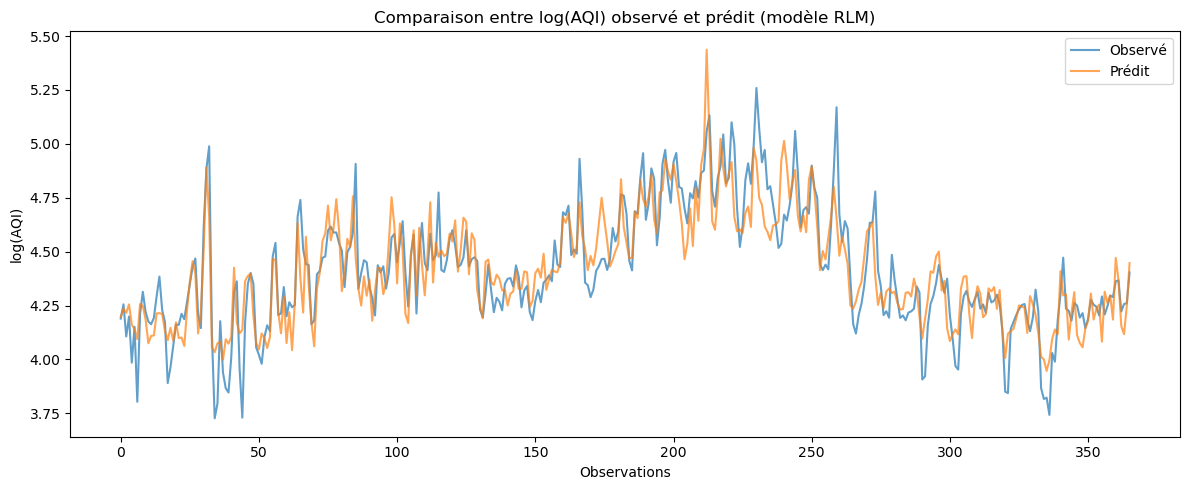

In [30]:
# Prédictions du modèle RLM
y_pred = model_rlm.fittedvalues
y_true = y

# Créer un DataFrame pour tracer les courbes
comparison_df = pd.DataFrame({
    'log_AQI_observé': y_true,
    'log_AQI_prédit': y_pred
})

# Tracer les courbes
plt.figure(figsize=(12, 5))
plt.plot(comparison_df['log_AQI_observé'].values, label='Observé', alpha=0.7)
plt.plot(comparison_df['log_AQI_prédit'].values, label='Prédit', alpha=0.7)
plt.title("Comparaison entre log(AQI) observé et prédit (modèle RLM)")
plt.xlabel("Observations")
plt.ylabel("log(AQI)")
plt.legend()
plt.tight_layout()
plt.show()
